In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

### Constants

In [2]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [3]:
#df = pd.read_csv('data/lane_changes_updated/lane_change_8.csv', sep=';')
#df = pd.read_csv('data/normal_drive.csv', sep=';')
#df = pd.read_csv('data/lane_changes_updated/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/20Hz/Vehicle-IMU-Acceleration-31.csv', sep=';')
#df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
#df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-24.csv', sep=';')
#df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
#df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df_AngularVel = pd.read_csv('data/2022-09-21_LaneChanges/AngularVelocities_Separated/Vehicle-IMU-AngularVelocities-50Hz-30.csv', sep=';')
#df_AngularVel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df = pd.concat([df_Accel, df_AngularVel], axis=1)
#df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/lane_changes/normal_drive.csv', sep=';')



# LATEST: 
df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-30.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/SteeringWheelAngle-30.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)


#df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

In [4]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [5]:
df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

### Morton indexing

In [6]:
#resolution = 18; dimension = 2
#hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

#points = df[['accel_lon','accel_trans']].to_numpy()

# Generate Hilbert index
#distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
#df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

df['morton'] = df.apply(set_value, axis=1)
df

,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle,morton
0,1663765134,97499,1663765134,97523,1663765134,97449,80109,74925,9.2650,1663765134097449,1663765134,89933,1663765134,89956,1663765134,89884,72089,13015111379
1,1663765134,197515,1663765134,197539,1663765134,197466,78410,77900,9.6135,1663765134197466,1663765134,189612,1663765134,189635,1663765134,189557,64941,7241898214
2,1663765134,298027,1663765134,298051,1663765134,297979,76540,76880,9.9195,1663765134297979,1663765134,289909,1663765134,289946,1663765134,289857,57451,7185137114
3,1663765134,397517,1663765134,397542,1663765134,397467,75945,76880,9.7665,1663765134397467,1663765134,389931,1663765134,389953,1663765134,389879,50136,7051339457
4,1663765134,497544,1663765134,497568,1663765134,497495,73480,79430,9.5965,1663765134497495,1663765134,489714,1663765134,489737,1663765134,489657,41513,6599542978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1663765159,598177,1663765159,598202,1663765159,598128,77050,93880,9.6135,1663765159598128,1663765159,590540,1663765159,590563,1663765159,590491,39667,6557335374
256,1663765159,698606,1663765159,698630,1663765159,698555,76540,93710,9.5965,1663765159698555,1663765159,690445,1663765159,690468,1663765159,690399,37255,6547756410
257,1663765159,798644,1663765159,798668,1663765159,798595,76370,93880,9.5710,1663765159798595,1663765159,790554,1663765159,790576,1663765159,790506,35781,6523105574
258,1663765159,898576,1663765159,898599,1663765159,898527,77900,94305,9.6305,1663765159898527,1663765159,890553,1663765159,890574,1663765159,890508,35400,6535262416


### Morton Plots

### Scatter Plots

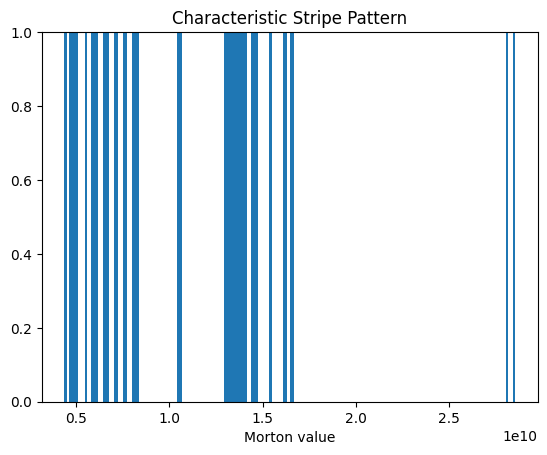

In [7]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df['morton'], bins=200)

min = df['morton'].min()
max = df['morton'].max()
max = 30000000000
#max = 20000000000

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
#plt.xlim(1,max)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)
plt.xlabel('Morton value')

plt.title("Characteristic Stripe Pattern")

plt.show()

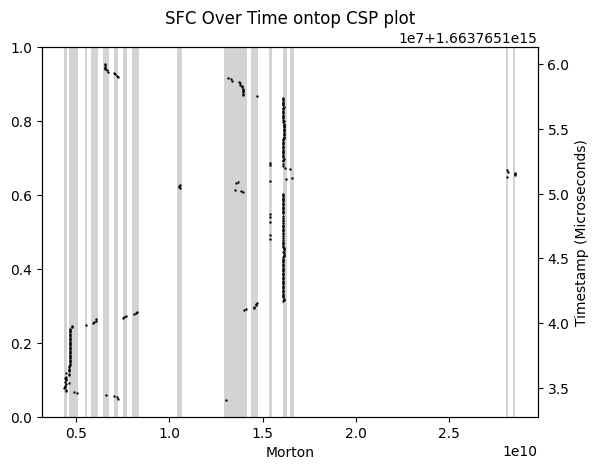

In [8]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')

plt.show()

##### 

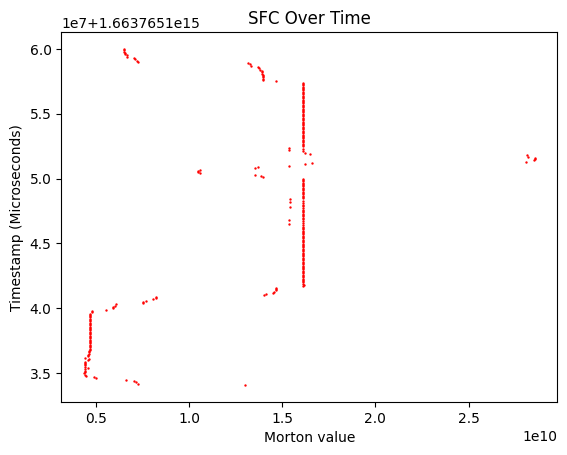

In [9]:
plt.scatter(x=df['morton'],y=df['ts'], c='red', s=0.5)
plt.title("SFC Over Time")
plt.xlabel("Morton value")
plt.ylabel("Timestamp (Microseconds)")
plt.show()
#output_df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'], title="Accelerations against Timestamp", xlabel="Timestamp (Microseconds)", ylabel="Acceleration (m/s\u00B2)")

#plt.savefig('MortonScatterTest9.png', transparent=True)

KeyError: 'accel_lon'

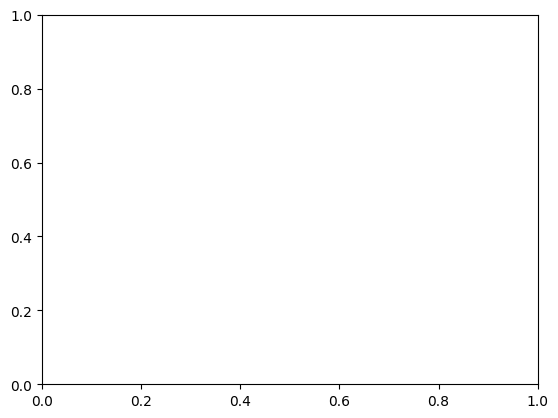

In [10]:
# 2D-plot with timestamp as color gradient
#df.plot(kind='scatter',x='SteeringWhlAngle',y='IMULatAcceleration',color=df['ts'])
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

In [ ]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")
ax.scatter3D(df['SteeringWhlAngle'],df['IMULatAcceleration'], color = "green")

### multidimensional plot

In [ ]:
# Plot result
#df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against Timestamp', xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)')
